# Regressão 01 - tarefa 02 - transformações em X e Y

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np


In [ ]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df.rename(columns={"sex":"gender"}, inplace=True)
df.head()


,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df["pct_tip"] = (df['tip'] / (df['total_bill'] - df['tip'])).round(2)

# Criando uma coluna que compreenderá os ganhos líquidos
# do restaurante, isto é, desconsiderando a gorjeta da receita.

df["net_bill"] = df["total_bill"] - df["tip"]


df.head()

,total_bill,tip,gender,smoker,day,time,size,pct_tip,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.06,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.19,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.20,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.16,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.17,20.98


<Axes: xlabel='net_bill', ylabel='tip'>

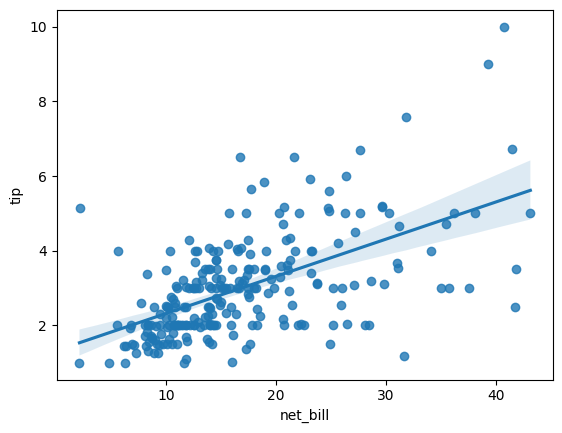

In [ ]:
sns.regplot(y="tip", x="net_bill", data=df)

In [ ]:
reg_model = smf.ols("tip ~ net_bill", data=df).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Wed, 03 Jan 2024   Prob (F-statistic):           5.02e-23
Time:                        18:37:17   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

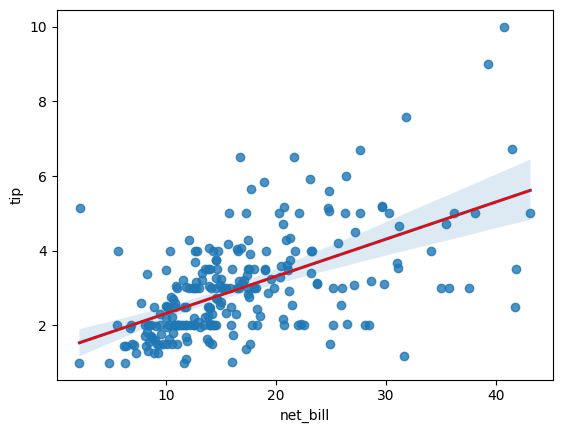

In [ ]:
# Verifcando o gráfico a partir da realização do modelo:

sns.regplot(x = 'net_bill', y = 'tip', data = df)
plt.plot(df['net_bill'], reg_model.fittedvalues, 'r,--')

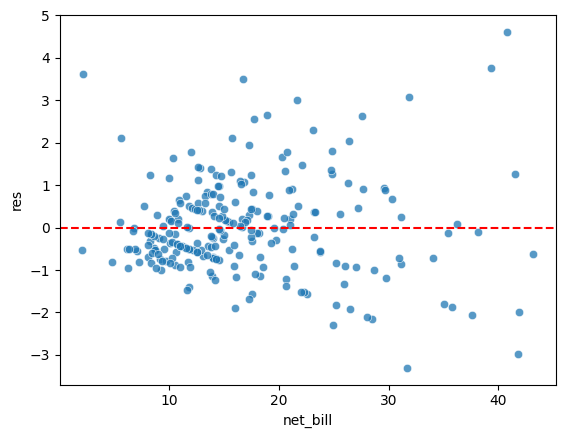

In [ ]:
df['res'] = reg_model.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')


A partir da exposição dos gráficos com base no modelo criado, nota-se que esse ainda possui um coeficiente de determinação baixo, bem como o motivo disso, que se refere a dinâmica, por assim dizer, dos dados que não seguem uma lógica linear, mas dispersa, "em forma de cone" à medida que se aumenta o x. Isso ocorre por qual motivo? Por que ambos os dados apresentam pouca correlação entre si de fato ou eu poderia melhorar o modelo, transformando alguma das variáveis?

**Correção:**

O gráfico apresenta essa aparência devido ao modelo adotado não ser efetivo, podendo ser consertado a partir do modelo adotado, bem como da transformação das variáveis adotadas.

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

<Axes: xlabel='net_bill', ylabel='pct_tip'>

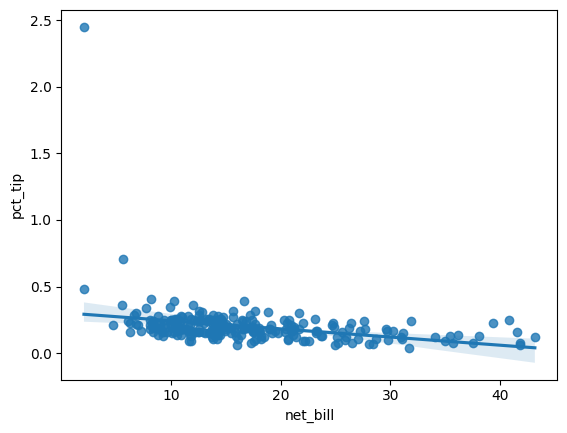

In [ ]:
sns.regplot(y="pct_tip", x="net_bill", data=df)

In [ ]:
reg_model = smf.ols("pct_tip ~ net_bill", data=df).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                pct_tip   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     24.17
Date:                Wed, 03 Jan 2024   Prob (F-statistic):           1.63e-06
Time:                        18:37:18   Log-Likelihood:                 108.21
No. Observations:                 244   AIC:                            -212.4
Df Residuals:                     242   BIC:                            -205.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3050      0.023     13.165      0.000       0.259       0.351
net_bill      -0.0061      0.001     -4.916      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.556   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234195.320
Skew:                          11.098   Prob(JB):                         0.00
Kurtosis:                     153.143   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

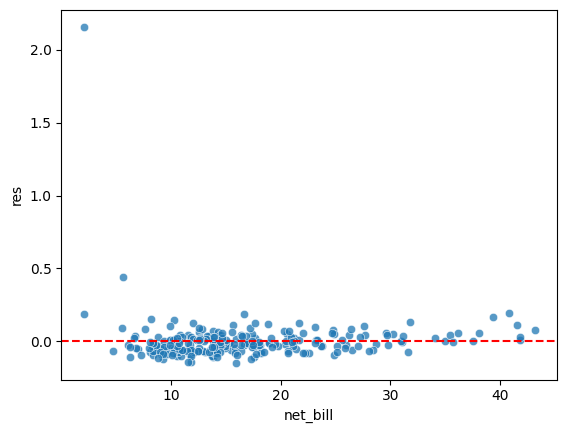

In [ ]:
df['res'] = reg_model.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')


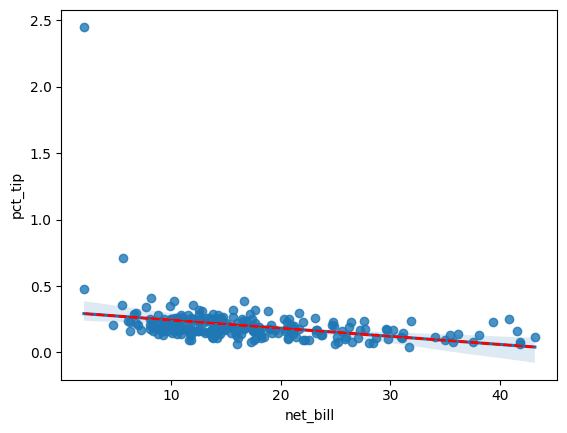

In [ ]:
# Verifcando o gráfico a partir da realização do modelo:

sns.regplot(x = 'net_bill', y = 'pct_tip', data = df)
plt.plot(df['net_bill'], reg_model.fittedvalues, 'r,--')

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                pct_tip   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     60.83
Date:                Wed, 03 Jan 2024   Prob (F-statistic):           1.85e-13
Time:                        18:37:19   Log-Likelihood:                 123.96
No. Observations:                 244   AIC:                            -243.9
Df Residuals:                     242   BIC:                            -236.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6168      0.054  

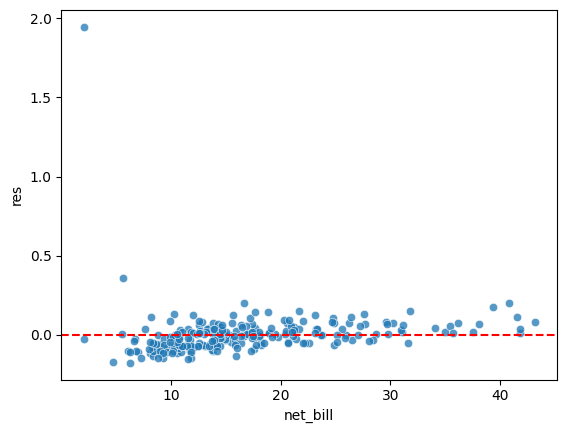

In [ ]:
# Ajustando a um novo modelo, agora com uma função logarítima:

reg = smf.ols('pct_tip ~ np.log(net_bill)', data = df).fit()
print(reg.summary())
df['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

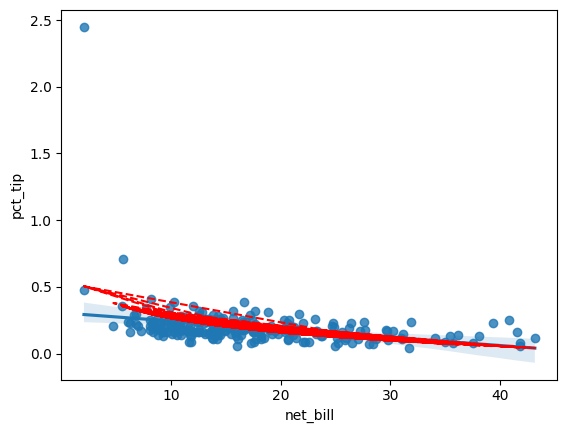

In [ ]:
# Verifcando o gráfico a partir da realização do modelo:

sns.regplot(x = 'net_bill', y = 'pct_tip', data = df)
plt.plot(df['net_bill'], reg.fittedvalues, 'r,--')

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                pct_tip   R-squared:                      -1.535
Model:                            OLS   Adj. R-squared:                 -1.535
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 03 Jan 2024   Prob (F-statistic):                nan
Time:                        18:37:20   Log-Likelihood:                -16.902
No. Observations:                 244   AIC:                             35.80
Df Residuals:                     243   BIC:                             39.30
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         9.138e-39   1.19e-38  

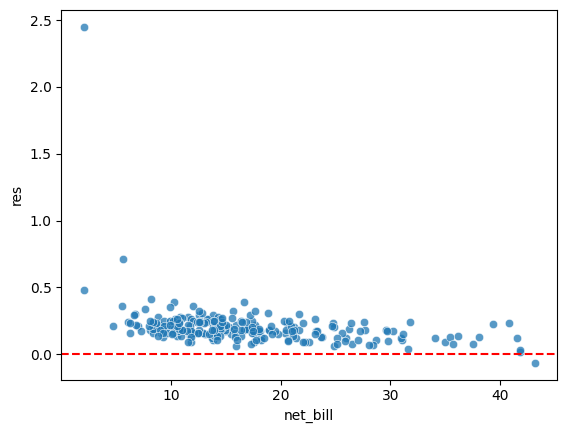

In [ ]:
# Ajustando a um novo modelo, agora com uma função logarítima:

reg = smf.ols('pct_tip ~ np.exp(net_bill)', data = df).fit()
print(reg.summary())
df['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

                            OLS Regression Results                            
Dep. Variable:        np.log(pct_tip)   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     73.95
Date:                Wed, 03 Jan 2024   Prob (F-statistic):           1.02e-15
Time:                        18:37:21   Log-Likelihood:                -105.84
No. Observations:                 244   AIC:                             215.7
Df Residuals:                     242   BIC:                             222.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2761      0.056    -22.908      0.0

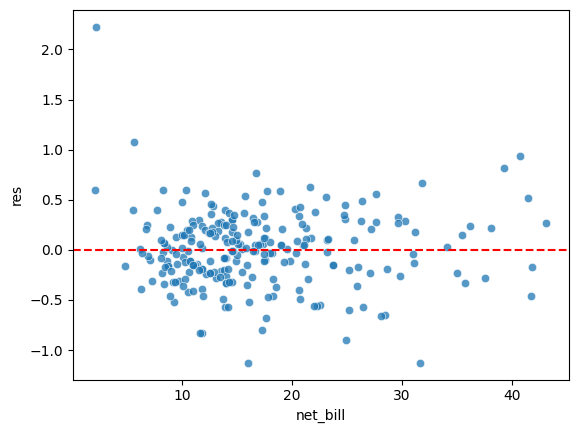

In [ ]:
# Ajustando a um novo modelo, agora com uma função logarítima
# do log no pct_tip em função de net_bill:

reg = smf.ols('np.log(pct_tip) ~ net_bill', data = df).fit()
print(reg.summary())
df['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [ ]:
df['pred_pct_tip'] = reg.fittedvalues

df[['pred_pct_tip', 'pct_tip']].corr().iloc[0,1]**2

0.0908007474527376

**- Dúvida:**

Não entendi essa parte. Tipo, eu tentei realizar o cálculo do R² para pct_tip a partir da predição do modelo criado com base na transformação da varíavel resposta. Eu esperava obter um R² próximo ao encontrado no sumário, mas se diferencia muito. Pode me ajudar a entender?

**correção:**

a discrepância do R² do sumário do modelo se refere à variável transformada (logarítmica de pct_tip), enquanto o R² que você calculou manualmente se refere à correlação entre os valores ajustados (logarítmicos) e os valores originais (não logarítmicos) de pct_tip. Essas são duas medidas diferentes.



Para fazer uma comparação justa, você precisa transformar de volta os valores ajustados para a mesma escala que pct_tip antes de calcular o R². Isso pode ser feito aplicando a função exponencial (que é a inversa do logaritmo natural) aos valores ajustados e então calculando a correlação com pct_tip.

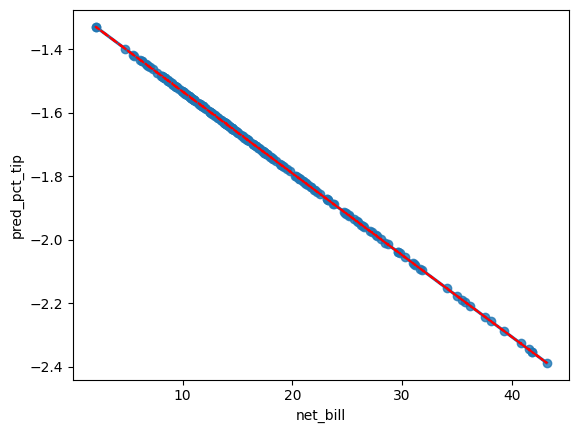

In [ ]:
df['pred_pct_tip'] = reg.fittedvalues

# Verifcando o gráfico a partir da realização do modelo:

sns.regplot(x = 'net_bill', y = 'pred_pct_tip', data = df)
plt.plot(df['net_bill'], reg.fittedvalues, 'r,--')

**- Dúvida:**

Eu ajustei o modelo colocando o log na variável resposta e o gráfico de regressão, bem como o de resíduos apresentaram uma certa melhora. Era isso para eu fazer, sendo esse o resultado esperado?

**Correção:**

Sim, a aplicação da transformação logarítmica na variável resposta é uma técnica comum para lidar com problemas de heterocedasticidade (variação homegênea dos dados) e para linearizar a relação entre as variáveis.



###  6. qual modelo resultou no melhor ajuste?

Com base no R² de ambos modelos, penso que o modelo que apresentou o melhor ajuste é aquele em que transformamos a variável resposta por meio do log, e não aquele em que a transformação incidiu sobre a variável explicativa. Se isso está correto, pode me explicar o motivo disso e quando saber quando o melhor ajuste se dá na transformação da variável resposta em detrimento da explicativa e vice-versa ?